## Task 1: Data pre-processing and data exploration (6 marks)


## Task 1: (a) 
Use Pandas to load both trainingSet.csv and testingSet.csv (1 mark).


In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics 
%matplotlib inline

trainingset=pd.read_csv("trainingSet.csv")
testingset= pd.read_csv("testingSet.csv")

## Task 1: (b) 
b) Find the number of patterns in each class for both loaded data sets using Python (1 mark).


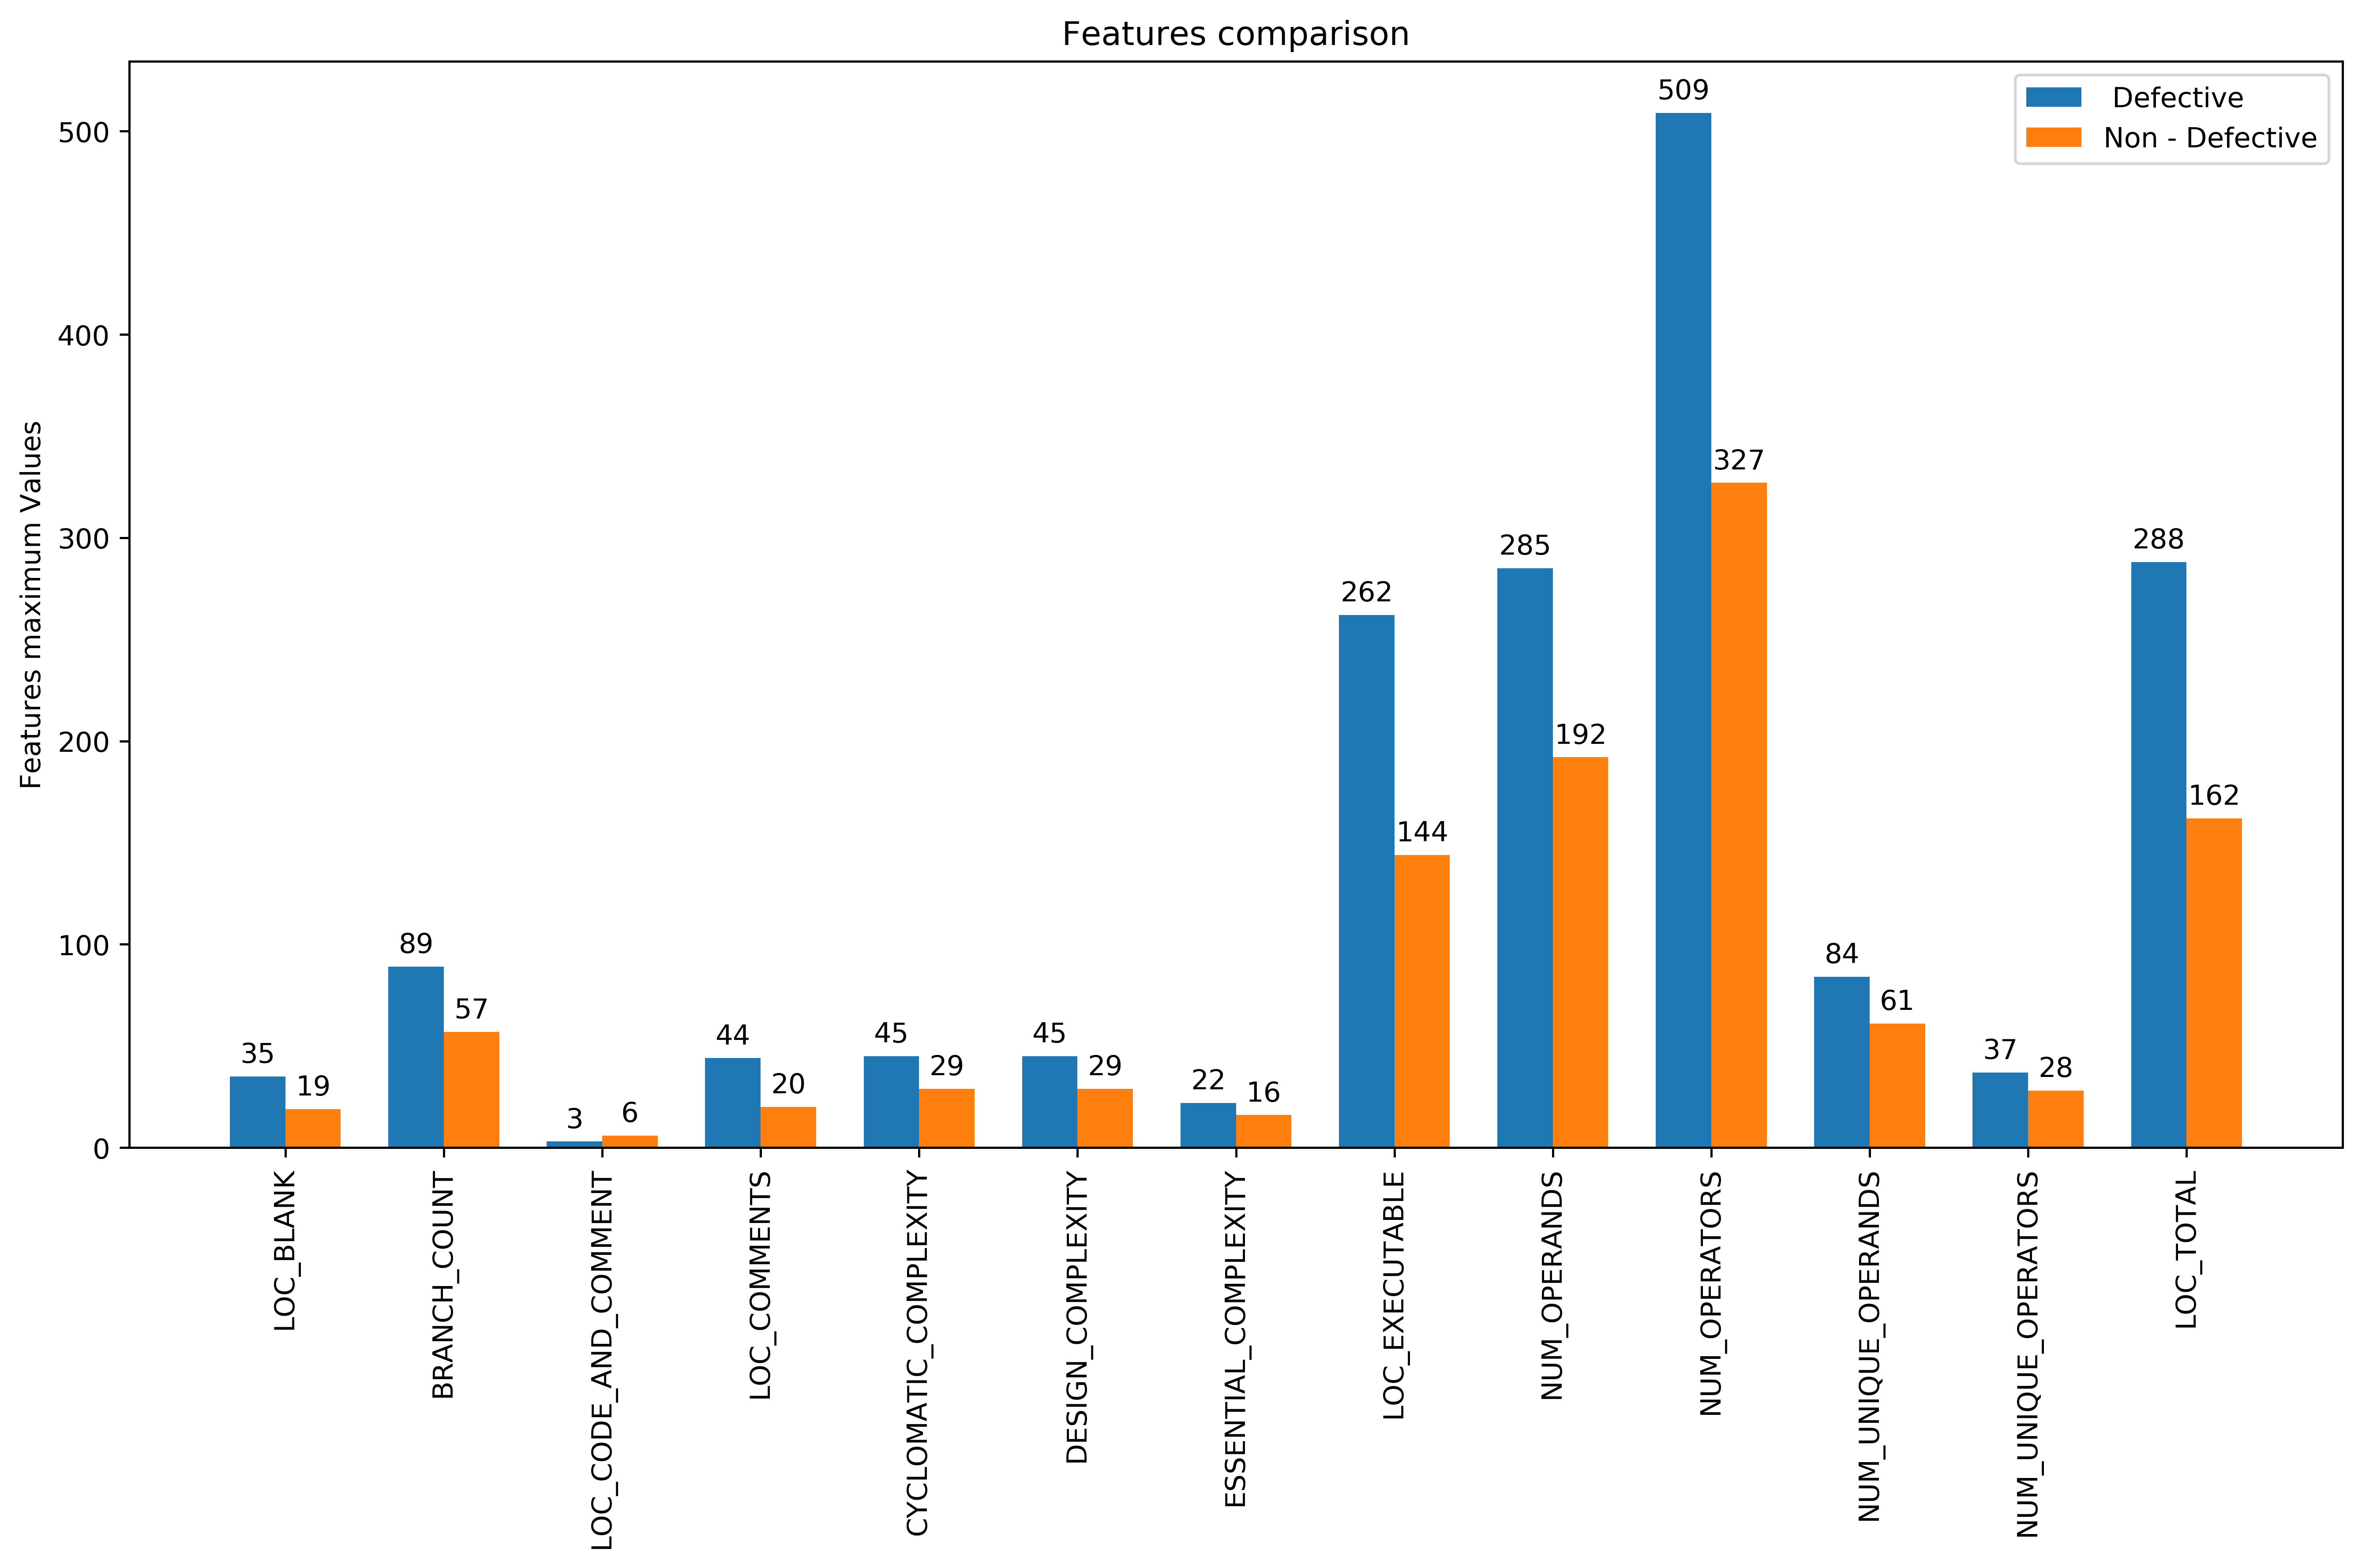

In [2]:
trainingset_class1 = trainingset[trainingset['DEFECTIVE']==1]
trainingset_class2 = trainingset[trainingset['DEFECTIVE']==-1]
columns= list(trainingset_class1.columns)
columns.remove("DEFECTIVE")
names=[]
class1=[]
class2=[]
for i in range(0,len(columns)):
    names.append(columns[i])
    class1.append(np.max(trainingset_class1.loc[:,columns[i]]))
    class2.append(np.max(trainingset_class2.loc[:,columns[i]]))
x = np.arange(len(columns))
width = 0.35 
fig, ax = plt.subplots(figsize=(12,8),dpi=450)
rects1 = ax.bar(x - width/2, class1, width, label=' Defective')
rects2 = ax.bar(x + width/2, class2, width, label='Non - Defective')

ax.set_ylabel('Features maximum Values')
ax.set_title('Features comparison')
ax.set_xticks(x)
ax.set_xticklabels(columns)
ax.legend()
ax.set_xticklabels(columns,rotation=90)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()


## Task 1: (c) 
c) Choose an attribute and generate a boxplot for the two classes in the training set (1 mark).

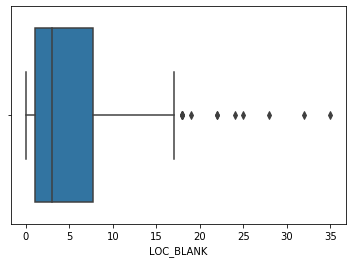

In [3]:
sns.boxplot(trainingset_class1["LOC_BLANK"])

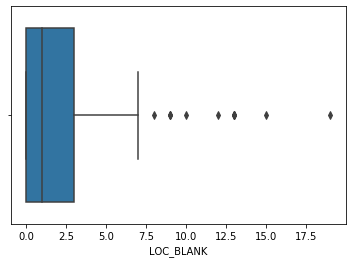

In [4]:
sns.boxplot(trainingset_class2["LOC_BLANK"])


## Task 1: (d) 
d) Show one scatter plot, that is, one feature against another feature. It is your choice to show which two features you want to use. You need to use the training set (2 marks).



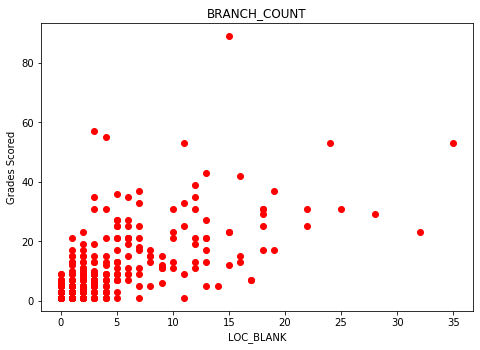

In [5]:
import numpy as np
import matplotlib.pyplot as plt


g1=list(trainingset.loc[:,"LOC_BLANK"])
g2=list(trainingset.loc[:,"BRANCH_COUNT"])
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(g1, g2, color='r')
ax.set_xlabel('LOC_BLANK')
ax.set_ylabel('Grades Scored')
ax.set_title('BRANCH_COUNT')
plt.show()



## Task 1: (e) 
e) Divide the original training set into a smaller training set (II) and a validation set. In this task, you need to use 55% of total training data points as the validation set (1 mark). 

In [6]:
X_train=trainingset[columns]
y_train=trainingset["DEFECTIVE"]

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.55, random_state=1)

## Task 2: Do a principal component analysis (10 marks)

## Task 2: (a)
Perform a PCA analysis on the original training data set (3 marks)

In [7]:
x = trainingset.loc[:, columns].values
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)


## Task 2: (b)
Plot a scree plot to report variances captured by each principal component (2 marks).

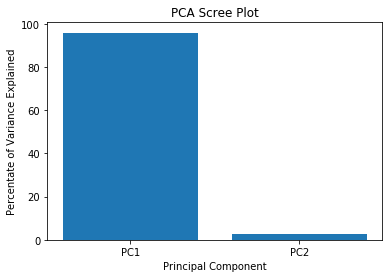

In [8]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns1 = ['PC1', 'PC2']
plt.bar(x= range(1,3), height=percent_variance, tick_label=columns1)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

## Task 2: (c)
Project the test set on the same PCA space produced by the original training dataset (2 marks).

In [9]:
test= testingset.loc[:, columns].values
newdata_transformed = pca.transform(test)

## Task 2: (d)
Plot two subplots in one figure: one for the training data in the PC1 and PC2 projection space and label the data in the picture according to its class; the other one for the test data in the same PCA space and label the data in the picture according to its class (3 marks)

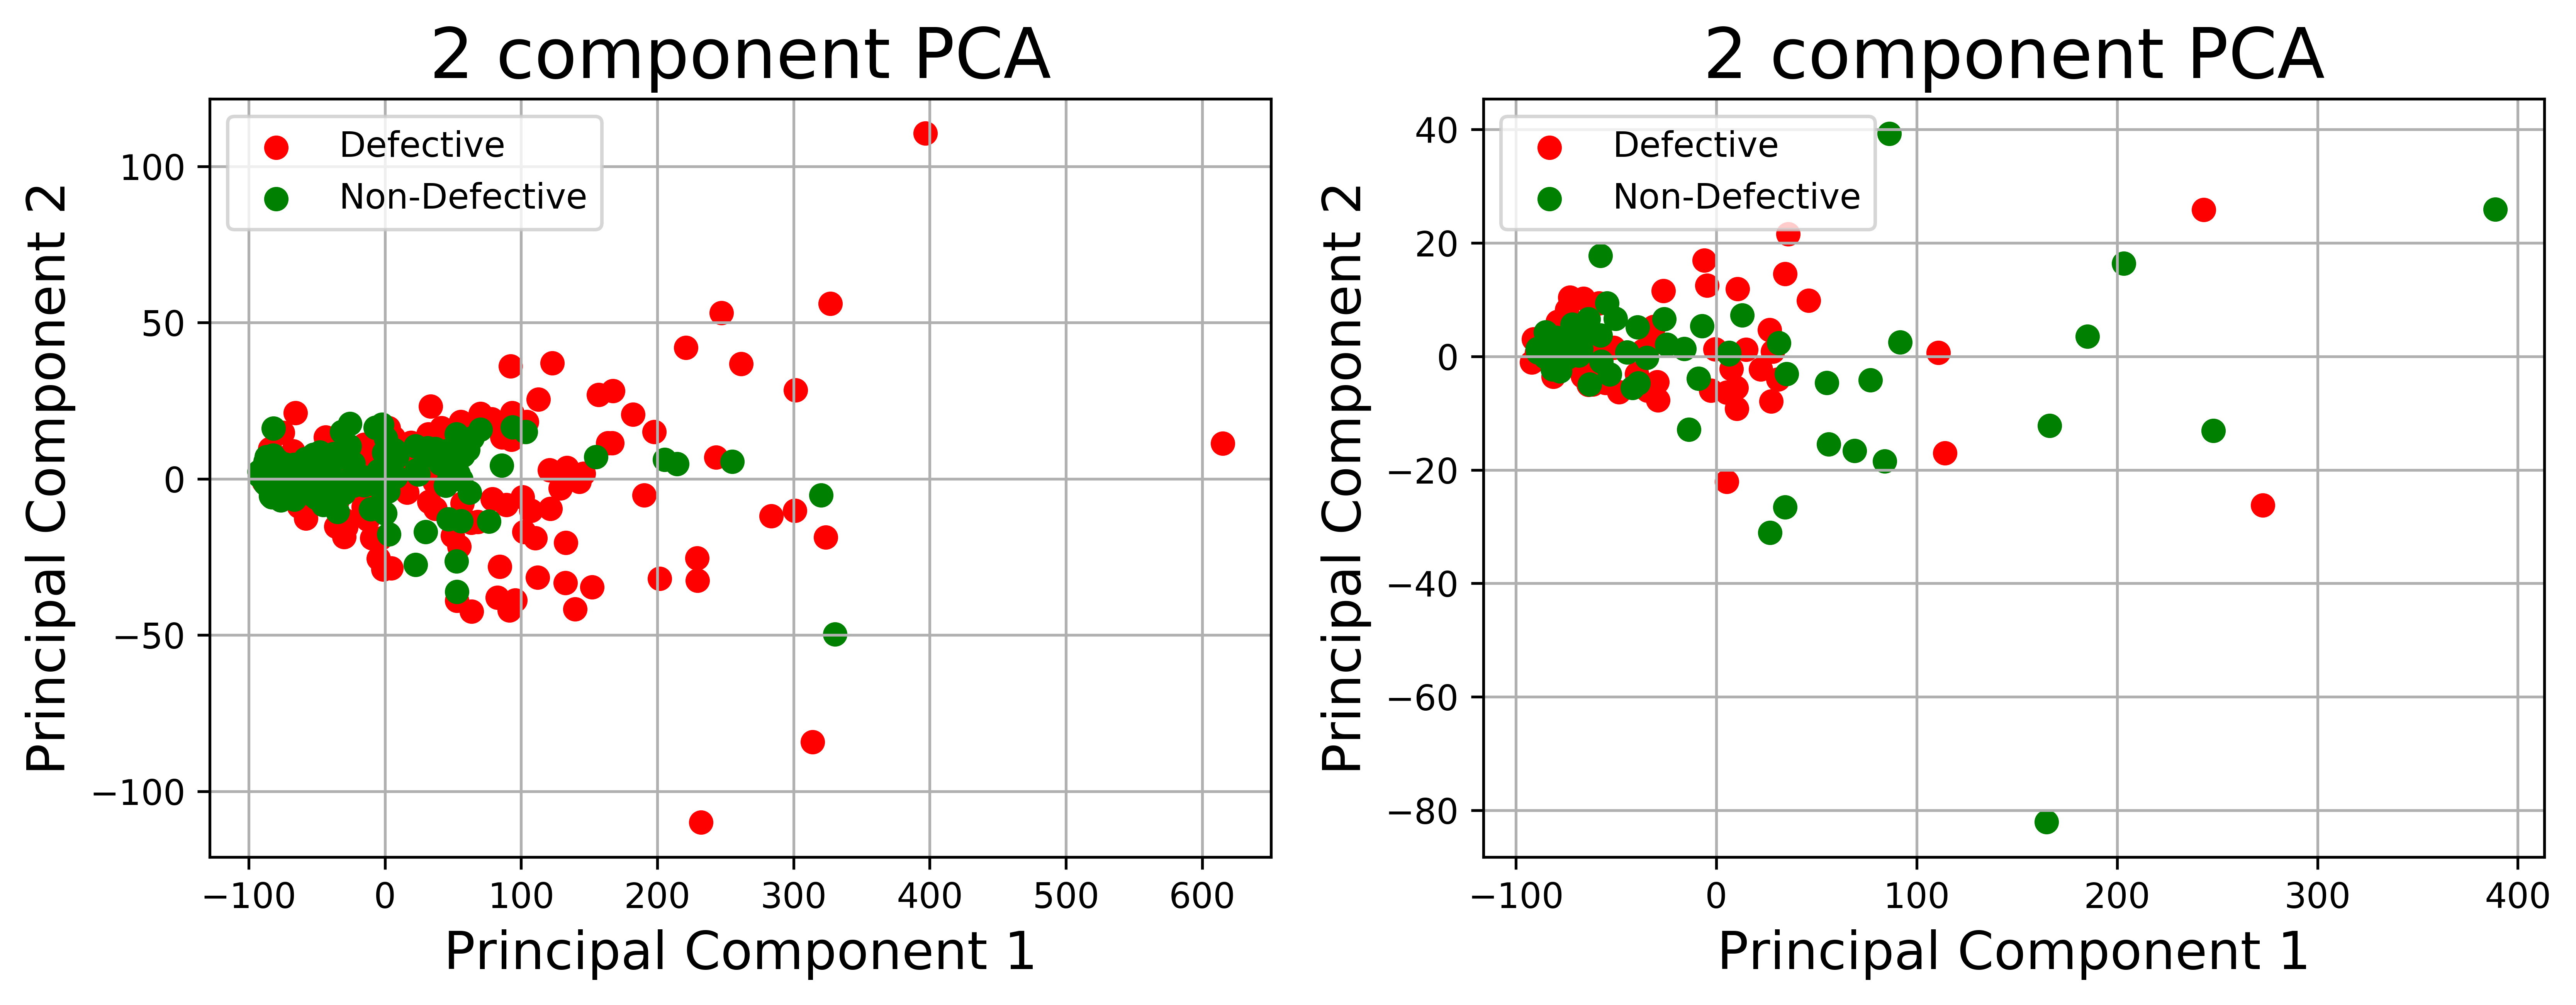

In [10]:
f = plt.figure(figsize=(12,4),dpi=650)
ax1 = plt.subplot2grid(shape=(1,2), loc=(0,0), colspan=1,rowspan=1,fig=f)
ax2 = plt.subplot2grid((1,2), (0,1), colspan=1,rowspan=1,fig=f)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, trainingset[['DEFECTIVE']]], axis = 1)
ax1.set_xlabel('Principal Component 1', fontsize = 15)
ax1.set_ylabel('Principal Component 2', fontsize = 15)
ax1.set_title('2 component PCA', fontsize = 20)
targets = [1,-1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['DEFECTIVE'] == target
    ax1.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color)
ax1.legend(['Defective', 'Non-Defective'])
ax1.grid()

principalDf = pd.DataFrame(data = newdata_transformed
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, trainingset[['DEFECTIVE']]], axis = 1)

ax2.set_xlabel('Principal Component 1', fontsize = 15)
ax2.set_ylabel('Principal Component 2', fontsize = 15)
ax2.set_title('2 component PCA', fontsize = 20)
targets = [1,-1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['DEFECTIVE'] == target
    ax2.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color)
ax2.legend(['Defective', 'Non-Defective'])
ax2.grid()

## Task 3: Do a classification using the Naïve Bayes Classification model (4 marks)
Train the model using the original training set and report the performance on the test set including accuracy rate.

In [11]:
X_train=trainingset[columns]
y_train=trainingset["DEFECTIVE"]
X_test=testingset[columns]
y_test=testingset["DEFECTIVE"]
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 
y_pred = gnb.predict(X_test) 
print("Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)


Naive Bayes model accuracy(in %): 61.76470588235294


## Task 4: Investigate how the number of features in the training dataset affects the model performance on the validation set (16 marks)

a) Use the training set (II) to train 13 Naïve Bayes Classification models, with 13 different feature sets. That is: the first one is to use the 1st feature only; the second one is to use the 1st and the 2nd features; the third one is to use the 1st, 2nd, and 3rd features, the fourth one is to use the first 4 features, and so on. Measure the accuracy rate on both the training set and the validation set. Report the results by plotting them in a figure: that is, a plot of the accuracy rate against the number of features used in each model. There should be two curves in this figure: one for the training set (II); the other one for the validation set (10 marks).

Features used: 
 ['LOC_BLANK']
Training Accuracy: 57.05521472392638
Validation Accuracy: 61.19402985074627

Features used: 
 ['LOC_BLANK', 'BRANCH_COUNT']
Training Accuracy: 60.122699386503065
Validation Accuracy: 60.19900497512438

Features used: 
 ['LOC_BLANK', 'BRANCH_COUNT', 'LOC_CODE_AND_COMMENT']
Training Accuracy: 60.73619631901841
Validation Accuracy: 60.19900497512438

Features used: 
 ['LOC_BLANK', 'BRANCH_COUNT', 'LOC_CODE_AND_COMMENT', 'LOC_COMMENTS']
Training Accuracy: 64.41717791411043
Validation Accuracy: 58.2089552238806

Features used: 
 ['LOC_BLANK', 'BRANCH_COUNT', 'LOC_CODE_AND_COMMENT', 'LOC_COMMENTS', 'CYCLOMATIC_COMPLEXITY']
Training Accuracy: 64.41717791411043
Validation Accuracy: 57.2139303482587

Features used: 
 ['LOC_BLANK', 'BRANCH_COUNT', 'LOC_CODE_AND_COMMENT', 'LOC_COMMENTS', 'CYCLOMATIC_COMPLEXITY', 'DESIGN_COMPLEXITY']
Training Accuracy: 63.80368098159509
Validation Accuracy: 56.71641791044776

Features used: 
 ['LOC_BLANK', 'BRANCH_COUNT', 'LOC_CODE_A

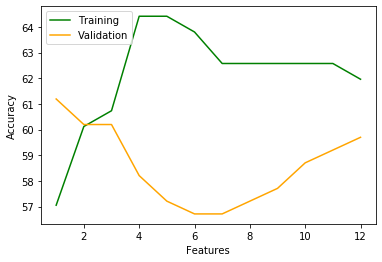

In [12]:
X_train=trainingset[columns]
y_train=trainingset["DEFECTIVE"]
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.55, random_state=1)

features=[]
training_score=[]
validation_score=[]
for i in range(1,len(columns)):
    trainx=X_train[columns[0:i]]
    testx=X_val[columns[0:i]]
    gnb = GaussianNB() 
    gnb.fit(trainx, y_train) 
    y_pred_train = gnb.predict(trainx) 
    y_pred = gnb.predict(testx) 
    print ("Features used: \n",columns[0:i])
    print("Training Accuracy:", metrics.accuracy_score(y_train, y_pred_train)*100)
    print("Validation Accuracy:", metrics.accuracy_score(y_val, y_pred)*100)
    print ()
    features.append(len(columns[0:i]))
    training_score.append(metrics.accuracy_score(y_train, y_pred_train)*100)
    validation_score.append(metrics.accuracy_score(y_val, y_pred)*100)

plt.plot(features, training_score, color='g')
plt.plot(features, validation_score, color='orange')
plt.xlabel('Features')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'],loc=2)
plt.show()


## Task 4: (b)
Report what is the best number of features you would like to use in this work and explain why you choose it. Write it down in your Jupyter notebook (3 marks).

## Solution:
I will use the 'LOC_BLANK' and 'BRANCH_COUNT' features as it have the highest validation accuracy


## Task 4: (c)
Use the selected number of features to train the model and report the performance on the test
set (3 marks)

In [13]:
X_train=trainingset[['LOC_BLANK','BRANCH_COUNT' ]]
y_train=trainingset["DEFECTIVE"]
X_test=testingset[['LOC_BLANK','BRANCH_COUNT' ]]
y_test=testingset["DEFECTIVE"]
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 
y_pred = gnb.predict(X_test) 
print("Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Naive Bayes model accuracy(in %): 56.61764705882353


## Task 5:
Summarize your findings, write your conclusions using critical thinking (no more than 100 words) and write it down in your Jupyter notebook (4 marks).

## Solution
In this assignment, I done the data analysis task. Following is my analysis.

### Task 1
In this task, I compared features based on the output class and plot the different graphs. The boxplot is plot using 'LOC_BLANK' and the scatter plot is plot using two features i.e. 'LOC_BLANK','BRANCH_COUNT. Also I divided the training data into 55% train and 45% validation set.  

### Task 2
In this task, I applied principle component analysis. The number of component are not mentioned so I used the defualt setting of 2 components. Then, scree plot is plotted. Subplot also plotted of training and testing set.

### Task 3
In this task, I applied naive based classification model using given training and testing sets. The model able to achieve 61% accuracy.

### Task 4
In this task, the combination of features are testing using training set. I selected the highest accuracy feature i.e 'LOC_BLANK','BRANCH_COUNT. Then, train it on training set and tested the accuracy. The accuracy is dropped from 61% to 56%.


### Analysis
1. Class balancing problem should also be investigated.
2. In my opinion other methods like correlation analysis, information, forward features selection and backward features selection should also tested. 
